In [1]:
import json

token = {
  "username": "manhnguyen1912",
  "key": "KGAT_cee31f61cbd9b5b1d09853c03f8a3208"
}

with open("/content/kaggle.json", "w") as f:
    json.dump(token, f)


In [2]:
!pip install -q kaggle --upgrade


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.9/88.9 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 33.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.4/160.4 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.6/13.6 MB 49.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 192.4/192.4 kB 17.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.2/55.2 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.9/268.9 kB 17.2 MB/s eta 0:00:00


In [3]:
!pip install -q --upgrade --force-reinstall kaggle


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.7/57.7 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.4/74.4 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 131.6/131.6 kB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.4/164.4 kB 17.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.3/323.3 kB 32.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.9/229.9 kB 24.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.7/64.7 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.9/152.9 kB 15.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.5/153.5 kB 16.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.3/108.3 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.0/71.0 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [4]:
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle datasets download -d daudshah/vehicle-detection-dataset

Dataset URL: https://www.kaggle.com/datasets/daudshah/vehicle-detection-dataset
License(s): Attribution 4.0 International (CC BY 4.0)
 98% 510M/521M [00:05<00:00, 114MB/s]
100% 521M/521M [00:05<00:00, 102MB/s]


In [6]:
!unzip -q /content/vehicle-detection-dataset.zip

In [7]:
!pip install -q -U ultralytics


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 26.4 MB/s eta 0:00:00


In [8]:
!cat "/content/data.yaml"


train: ../train/images
val: ../valid/images
test: ../test/images

nc: 7
names: ['bicycle', 'bus', 'car', 'motorbike', 'rickshaw', 'truck', 'van']

roboflow:
  workspace: object-detection-sn8ac
  project: ai-traffic-system
  version: 1
  license: CC BY 4.0
  url: https://universe.roboflow.com/object-detection-sn8ac/ai-traffic-system/dataset/1

In [15]:
from ultralytics import YOLO

model = YOLO("runs/detect/yolov8n_vehicle/weights/best.pt")

model.train(
    data="data.yaml",
    epochs=45,
    imgsz=640,
    batch=32,
    device=0,
    workers=2,
    name="yolov8n_fast_tune",
    freeze=10,
    close_mosaic=5,
    box=7.0,
    cls=1.3,
    dfl=1.5,
    patience=5
)




Ultralytics 8.4.8 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, angle=1.0, augment=False, auto_augment=randaugment, batch=32, bgr=0.0, box=7.0, cache=False, cfg=None, classes=None, close_mosaic=5, cls=1.3, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, end2end=None, epochs=45, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=10, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=runs/detect/yolov8n_vehicle/weights/best.pt, momentum=0.937, mosaic=1.0, multi_scale=0.0, name=yolov8n_fast_tune, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5, 6])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7d7fbcf2aed0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
  

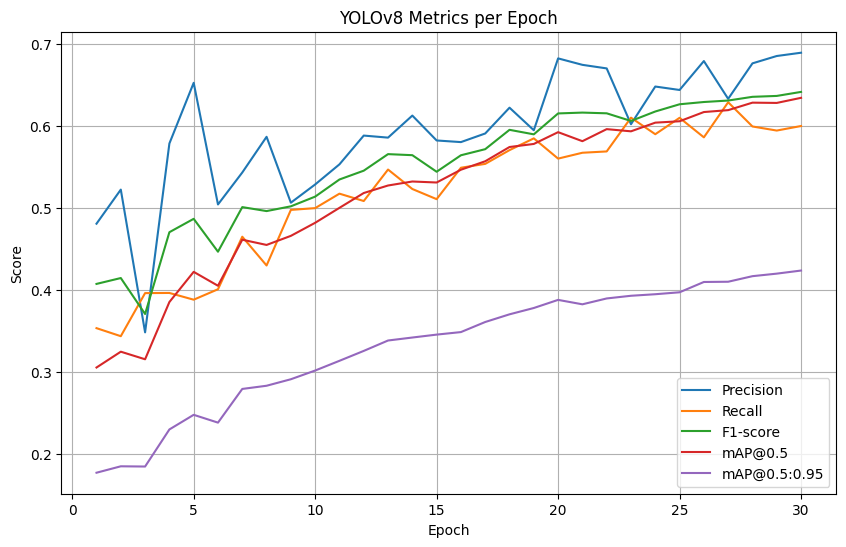

Ultralytics 8.4.8 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 73 layers, 3,007,013 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1213.1±160.5 MB/s, size: 54.3 KB)
val: Scanning /content/valid/labels.cache... 1072 images, 231 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 1072/1072 281.0Mit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 67/67 6.0it/s 11.1s
                   all       1072       3375      0.686        0.6      0.634      0.424
               bicycle         82        109      0.649      0.578      0.571      0.366
                   bus        290        428      0.752      0.659      0.709      0.494
                   car        636       2021      0.846      0.787      0.842      0.611
             motorbike        194        313      0.691      0.604      0.615      0.375
              rickshaw        203        325      0.

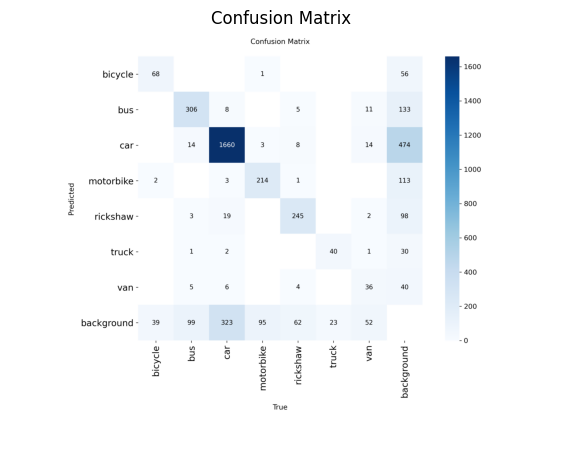

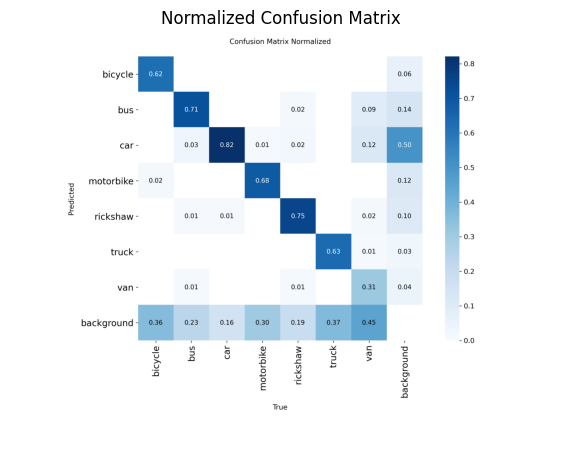

In [16]:

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from ultralytics import YOLO
import os


RUN_DIR = "runs/detect/yolov8n_vehicle"
CSV_PATH = f"{RUN_DIR}/results.csv"
WEIGHT_PATH = f"{RUN_DIR}/weights/best.pt"
DATA_YAML = "data.yaml"

df = pd.read_csv(CSV_PATH)
epochs = range(1, len(df) + 1)

precision = df["metrics/precision(B)"]
recall = df["metrics/recall(B)"]
map50 = df["metrics/mAP50(B)"]
map5095 = df["metrics/mAP50-95(B)"]


f1 = 2 * precision * recall / (precision + recall + 1e-8)


plt.figure(figsize=(10,6))
plt.plot(epochs, precision, label="Precision")
plt.plot(epochs, recall, label="Recall")
plt.plot(epochs, f1, label="F1-score")
plt.plot(epochs, map50, label="mAP@0.5")
plt.plot(epochs, map5095, label="mAP@0.5:0.95")
plt.xlabel("Epoch")
plt.ylabel("Score")
plt.title("YOLOv8 Metrics per Epoch")
plt.legend()
plt.grid(True)
plt.show()


model = YOLO(WEIGHT_PATH)
model.val(data=DATA_YAML, plots=True)


cm_path = os.path.join(RUN_DIR, "confusion_matrix.png")
cm_norm_path = os.path.join(RUN_DIR, "confusion_matrix_normalized.png")

if os.path.exists(cm_path):
    img = mpimg.imread(cm_path)
    plt.figure(figsize=(7,7))
    plt.imshow(img)
    plt.axis("off")
    plt.title("Confusion Matrix")
    plt.show()

if os.path.exists(cm_norm_path):
    img = mpimg.imread(cm_norm_path)
    plt.figure(figsize=(7,7))
    plt.imshow(img)
    plt.axis("off")
    plt.title("Normalized Confusion Matrix")
    plt.show()
